In [2]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

# y=4x+3+random

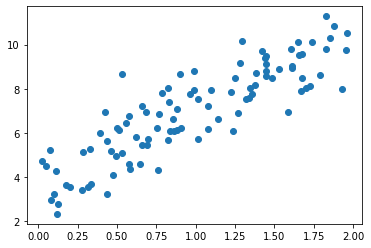

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [9]:
#정규방정식으로 예측
X_b = np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.68851561]
 [3.34948369]]


In [22]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0=1 추가
y_predict = X_new_b.dot(theta_best)

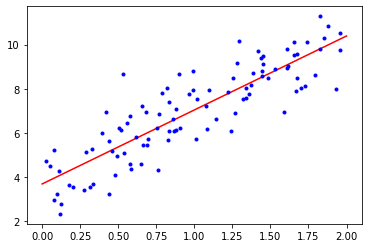

In [23]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')

사이킷런으로 LR을 수행하는 것은 간단하다.

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.68851561] [[3.34948369]]
[[ 3.68851561]
 [10.387483  ]]


LinearRegression은 scipy.linalg.lstsq()를 기반으로 하므로 이 함수를 직접 호출할 수 있다.

In [26]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

[[3.68851561]
 [3.34948369]]


유사역행렬은 특이값분해(SVD)를 사용해 계산되는데 이는 정규방정식보다 효율적이고, 특이행렬이라서 정규방정식이 작동하지 않는 경우에도 유사역행렬은 구할 수 있다.
특성의 수의 제곱만큼 복잡도가 증가한다 O(N^2) 하지만 샘플의 수에 대해서는 선형적으로 증가한다 O(N)

경사 하강법은 비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 과정으로 θ를 임의값으로 정하고 비용함수(RMSE, MES)가 감소되는 방향으로 진행하여 최솟값(gradient=0)이 될 때까지 점진적으로 향상시킨다. 
스텝의 크기(learning rate)가 중요한 파라미터이다. lr이 크면 정밀도가 떨어지고 작으면 시간이 오래걸린다.

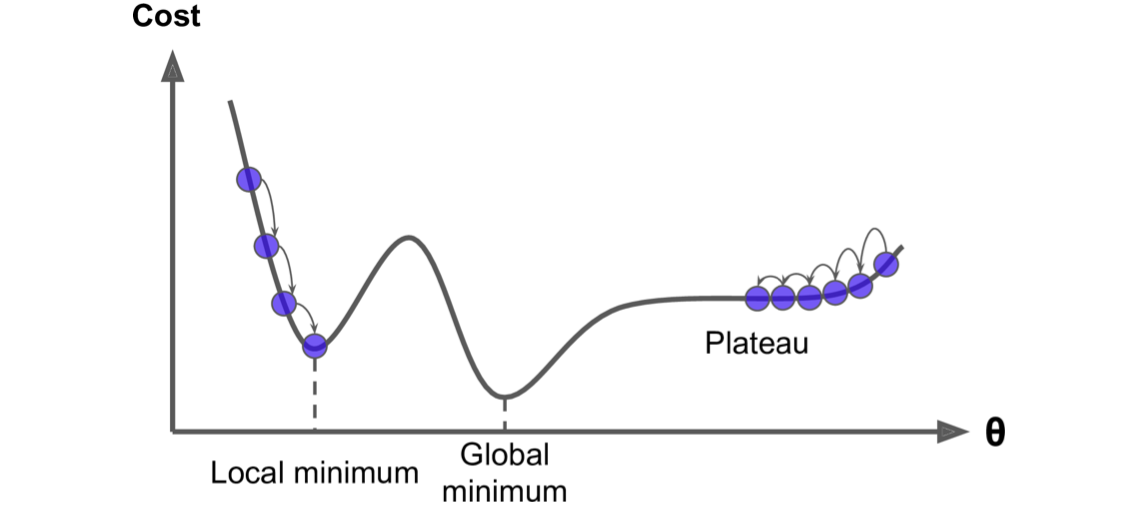
local minumum에 갖혀 global minimum에 도달하지 못하거나, 오른쪽의 평평한곳에 갖혀 시간이 지나 멈춰버려 global minimum에 도달하지 못할 수 있다.

다행히도 Linear Regression을 위한 MSE비용함수는 볼록함수이므로 하나의 최솟값만 갖는다.

<b>Gradient decent를 사용할때 모든 특성이 같은 스케일을 갖도록 하지 않으면(Standard Scaler사용) 시간이 오래 걸린다.</b>

In [28]:
eta = 0.1 #learning rate
n_iterations = 1000
m=100

theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

print(theta)

[[3.68851561]
 [3.34948369]]


In [39]:
lin_reg.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

모든 스텝에서 전체 훈련세트를 사용해 gradient를 계산해 느린 배치 경사 하강법의 단점을 확률적 경사 하강법(SGD)은 매 스탭에서 훈련세트 하나를 무작위로 선택하여 계산함으로서 보완한다.

다만, 무작위성은 local minumum에 갖히지 않게 해주지만 정확한 global mininum에 도달할 수 없게 하기 때문에 lr을 점진적으로 감소시켜 이를 해결한다. 매 반복에서 학습률을 결정하는 함수를 학습스케쥴이라고 한다.

In [43]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케쥴 하이퍼 파라미터

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.72141527]
 [3.36107662]]


In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
#최대1000에포크동안 실행, 손실이 0.001보
sgd_reg.fit(X,y.label())